---------Youtube Spam Classification----------

In this tutorial you will learn handling Text data.
We can come across situations where the data is not numbers , but
The data is text so what we can do in that situation.

The one thing that can we do is tokenize the data ,that is we should
separate each and every character . And develop a matrix of 
token counts . And this is acheived using Sklearn's CountVectorizer
module that is present in the feature_extraction.text class in sklearn.

class sklearn.feature_extraction.text.CountVectorizer(input=’content’,
                                                      encoding=’utf-8’, 
                                                      decode_error=’strict’,
                                                      strip_accents=None,
                                                      lowercase=True,
                                                      preprocessor=None,
                                                      tokenizer=None,
                                                      stop_words=None,
                                                      token_pattern=’(?u)\b\w\w+\b’,
                                                      ngram_range=(1, 1),
                                                      analyzer=’word’,
                                                      max_df=1.0, min_df=1, 
                                                      max_features=None,
                                                      vocabulary=None,
                                                      binary=False,
                                                      dtype=<class ‘numpy.int64’>)

Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Getting our dataset

dataset = pd.read_csv('Downloads/Youtube01-Psy.csv',encoding='latin-1')
dataset.dropna()
dataset.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


In [3]:
# Getting X_data

X_data = dataset.iloc[:,3].values
X_data[0:5]

array(['Huh, anyway check out this you[tube] channel: kobyoshi02',
       "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!",
       'just for test I have to say murdev.com',
       'me shaking my sexy ass on my channel enjoy ^_^ ï»¿',
       'watch?v=vtaRGgvGtWQ   Check this out .ï»¿'], dtype=object)

In [4]:
# Getting Y_data

Y_data = dataset.iloc[:,-1].values
Y_data[0:5]

array([1, 1, 1, 1, 1])

In [5]:
# Splitting Data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data)

In [6]:
# Importing CountVectorizer to tokenize the data

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
# Transforming x_train and x_test

x_train = vect.transform(x_train)
x_test = vect.transform(x_test)

In [8]:
# Printing the number of instances of unique categories

unique , counts = np.unique(Y_data,return_counts=True)
print(unique,counts)

[0 1] [175 175]


In [9]:
x_train[0:5]

<5x1240 sparse matrix of type '<class 'numpy.int64'>'
	with 85 stored elements in Compressed Sparse Row format>

In [10]:
# We are using Logistic Regression for classification becuase it is 
# suitable for one to one relationships

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Getting the accuracy score on training data

classifier.score(x_train,y_train)

1.0

In [12]:
# Getitng accuracy score on testing data

from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,x_test,y_test,cv=5)
print(results)

[1.         1.         0.94444444 0.94117647 0.94117647]


In the best case scenario we get a accuracy score of 100%

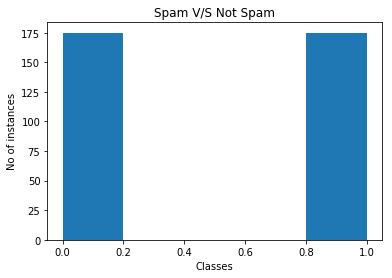

In [13]:
#Plotting Class 

plt.hist(Y_data,bins=5)
plt.title('Spam V/S Not Spam')
plt.xlabel('Classes')
plt.ylabel('No of instances')
plt.show()